In [2]:
pip install nltk

In [3]:
pip install nrcLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrcLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=a8877dcb735f1792f5bde4ff920caa23ce4c97af987ddb02b32f1da8f02ade35
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrcLex


In [4]:
from nrclex import NRCLex

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import spacy
from nltk.corpus import stopwords
#from nltk.corpus import NRC_Emotion
from collections import defaultdict

In [7]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")
# Load the NRC Emotion Lexicon
nrc_lexicon = NRCLex

In [8]:
emotion_list=[]

In [9]:
txt = "beautiful"
emo = nrc_lexicon(txt)
print(emo.top_emotions)
emotion_list.append(emo.top_emotions)

[('positive', 0.5), ('joy', 0.5)]


In [10]:
import pandas as pd
import numpy as np

In [11]:
zz= pd.DataFrame(emotion_list)

In [12]:
zz

,0,1
0,"(positive, 0.5)","(joy, 0.5)"


In [13]:
zz = zz.applymap(lambda x: ('Na',0) if x is None else x)

<ipython-input-13-47ccc4e3d2c1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  zz = zz.applymap(lambda x: ('Na',0) if x is None else x)


In [14]:
tt = pd.DataFrame({'Emotion_name':[0],'EMo_score':[0]})
emo_score_list = pd.DataFrame({'Emotion_name':[],'EMo_score':[]})

In [15]:
unique_emo = set()
for i in range (len(zz)):
  for j in range (len(zz.columns)):
    unique_emo.update({zz[j][i][0]})
    tt['Emotion_name']= zz[j][i][0]
    tt['EMo_score']=zz[j][i][1]
    emo_score_list = pd.concat([emo_score_list,tt],axis=0)

In [16]:
emo_score_list

,Emotion_name,EMo_score
0,positive,0.5
0,joy,0.5


In [17]:
kk = pd.DataFrame(emo_score_list.groupby('Emotion_name')['EMo_score'].mean().reset_index())


In [18]:
print(kk.columns.values)

['Emotion_name' 'EMo_score']


In [19]:
pip install matplotlib

In [20]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

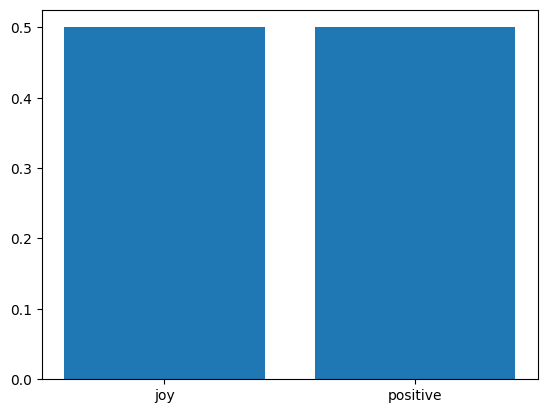

In [21]:
plt.bar(kk['Emotion_name'][kk['EMo_score']>0],kk['EMo_score'][kk['EMo_score']>0])

In [22]:
# Define a function to extract emotions from a sentence
def extract_emotions(sentence):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    emotion_list1 = []
    # Remove stopwords
    tokens = [token.text.lower() for token in doc if token.text.lower() not in stopwords.words('english')]
    for token in tokens:
        emo = nrc_lexicon(nlp(token)[0].lemma_)
        print(emo.top_emotions)
        emotion_list1.append(emo.top_emotions)
    return emotion_list1

In [24]:
# Test the function
input_sentence = "I'm like to think I am amazingly thrilled to see you fly."
emotion_list = extract_emotions(input_sentence)

[('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
[('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
[('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
[('surprise', 0.3333333333333333), ('positive', 0.3333333333333333), ('joy', 0.3333333333333333)]
[('fear', 0.2), ('surprise', 0.2), ('positive', 0.2), ('joy', 0.2), ('anticipation', 0.2)]
[('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
[('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.